In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/to fit poly.csv')

In [ ]:
df.head()

,features,labels
0,-1.112027,3.226295
1,1.482929,-0.873276
2,-1.173123,0.153632
3,1.674444,-0.888443
4,-0.046355,0.988443


In [ ]:
x = df['features'].values
y = df['labels'].values

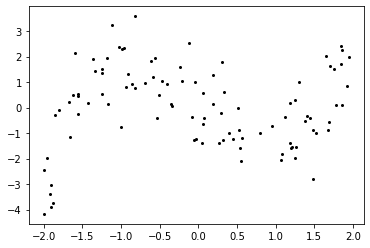

In [ ]:
plt.plot(x,y,'ko',markersize=2)

create X the matrix of features. Each row are the powers of the original features from 1 to k

In [2]:
def powers_of_features(x,k):
  X = x.reshape(len(x),1)
  for i in range(1,k):
    X = np.column_stack((X, x*X[:,-1]))
  return X

def scale(x):
  mu = np.mean(x,axis=0)
  st = np.std(x,axis=0)
  return (x-mu)/st,mu,st  

def add_one_end_rows(X):
  return np.column_stack((X, np.ones(X.shape[0])))

def best_lin(X,y):
  C = add_one_end_rows(X)
  A = np.matmul(C.T,C)
  r = np.dot(C.T,y)
  z = np.linalg.solve(A,r)
  w = z[:-1]
  b = z[-1]
  return w, b  

Find the polynomial that best fits the data. Input x (the features) and y the labels and d the degree of the polynomial

In [3]:
def best_polynomial(x,y,d):
  X = powers_of_features(x,d)
  X_scaled, X_mean, X_std = scale(X)
  y_scaled, y_mean, y_std = scale(y)
  w, b = best_lin(X_scaled,y_scaled)
  return w, b, X_mean, X_std, y_mean, y_std

Function to make predictions. Input the features of several examples. x 1-dimensional numpy array. Results, the predictions of the labels.

In [4]:
def scaled_predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std):
  x_scaled = (x-X_train_mean)/X_train_std
  y_hat_scaled = np.matmul(x_scaled,w) + b
  return y_hat_scaled  
  
def predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std):
  y_hat_scaled = scaled_predictions(x, w, b, X_train_mean, X_train_std, y_train_mean, y_train_std)
  y_hat = y_train_std*y_hat_scaled + y_train_mean
  return y_hat
  
def predictions_polynomial(x, w, b, X_mean, X_std, y_mean, y_std):
  X = powers_of_features(x,len(w))
  return predictions(X, w, b, X_mean, X_std, y_mean, y_std)

In [10]:
x = np.random.random(40)

In [25]:
er = np.random.randn(40)

In [26]:
v = np.random.random(20)
vr = np.random.randn(20)

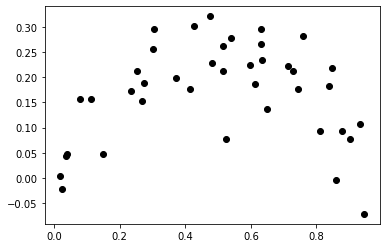

In [30]:
y = x*(1-x) +0.06*er
yv = v*(1-v) +0.06*vr
plt.plot(x,y,'ko')

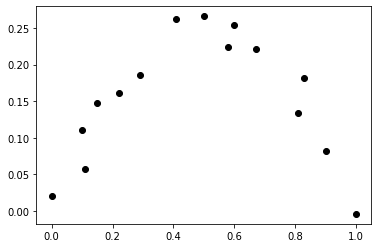

In [ ]:
x = np.array([0,0.1,0.11,0.15,0.22,0.29,0.41,0.5,0.58,0.6,0.67,0.81,0.83,0.9,1])
y = x*(1-x)
y = y+0.02*np.array([1,1,-2,1,-0.5,-1,1,0.8,-1,0.7,0,-1,2,-0.4,-0.2])
plt.plot(x,y,'ko')

In [ ]:
df = pd.DataFrame()
df['     '] = x
df['      '] = x*x
df['y = label'] = y

df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
,0.00,0.10,0.1100,0.1500,0.2200,0.2900,0.4100,0.500,0.5800,0.600,0.6700,0.8100,0.8300,0.900,1.000
,0.00,0.01,0.0121,0.0225,0.0484,0.0841,0.1681,0.250,0.3364,0.360,0.4489,0.6561,0.6889,0.810,1.000
y = label,0.02,0.11,0.0579,0.1475,0.1616,0.1859,0.2619,0.266,0.2236,0.254,0.2211,0.1339,0.1811,0.082,-0.004


Text(0, 0.5, 'label')

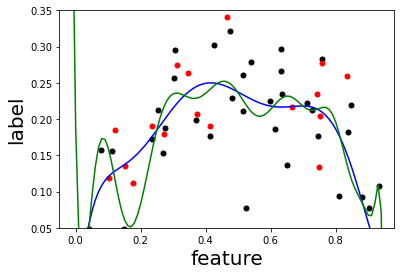

In [52]:
z = np.arange(-0.2,1.2,0.01)
plt.plot(x,y,'ko',markersize=5)
plt.plot(v,yv,'ro',markersize=5)

#w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x,y,1)
#u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
#plt.plot(z,u,'r')

#w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x,y,2)
#u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
#plt.plot(z,u,'b')

w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x,y,7)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'b')
w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x,y,30)
u = predictions_polynomial(z, w, b, X_mean, X_std, y_mean, y_std)
plt.plot(z,u,'g')
plt.xlim(-0.05,0.98)
plt.ylim(0.05,0.35)
plt.xlabel('feature',fontsize=20)
plt.ylabel('label',fontsize=20)
#plt.text(0.4,0,'degree 14',fontsize=20)

In [38]:
def mean_square_error(y,y_hat,y_mean,y_std):
  y_scaled = (y-y_mean)/y_std
  y_hat_scaled = (y_hat-y_mean)/y_std
  return np.sum((y_scaled - y_hat_scaled)**2)/len(y)

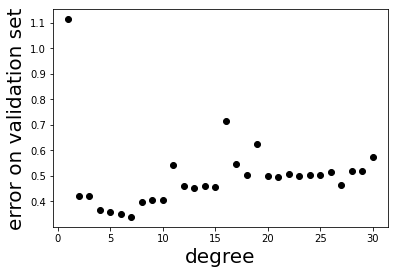

In [57]:
J = np.empty(0)
deg = []
for d in range(1,31):
  w, b, X_mean, X_std, y_mean, y_std = best_polynomial(x,y,d)
  y_hat = predictions_polynomial(v, w, b, X_mean, X_std, y_mean, y_std)
  J = np.append(J,mean_square_error(yv,y_hat,y_mean,y_std))
  deg.append(int(d))
plt.xlabel('degree',fontsize=20)
plt.ylabel('error on validation set',fontsize=20)
plt.plot(deg,J,'ko')

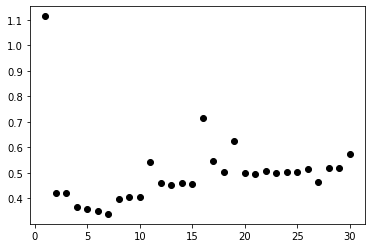

In [54]:
plt.plot(deg,J,'ko')

In [ ]:
df = pd.DataFrame()
df['Degree'] = deg
df['Error'] = J
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Degree,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000
Error,0.995084,0.062584,0.059092,0.057855,0.056808,0.056272,0.054467,0.049407,0.048341,0.046011,0.067634,0.050939,0.024742,0.023732
